In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 2.58MB/s]

Extracting files...
Path to dataset files: C:\Users\SCENTECH SERVICES\.cache\kagglehub\datasets\altruistdelhite04\loan-prediction-problem-dataset\versions\1


## Loan Prediction Dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings

warnings.filterwarnings('ignore')



In [28]:

data= pd.read_csv('dataset/loan/train.csv')

data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [29]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Analyzing Data

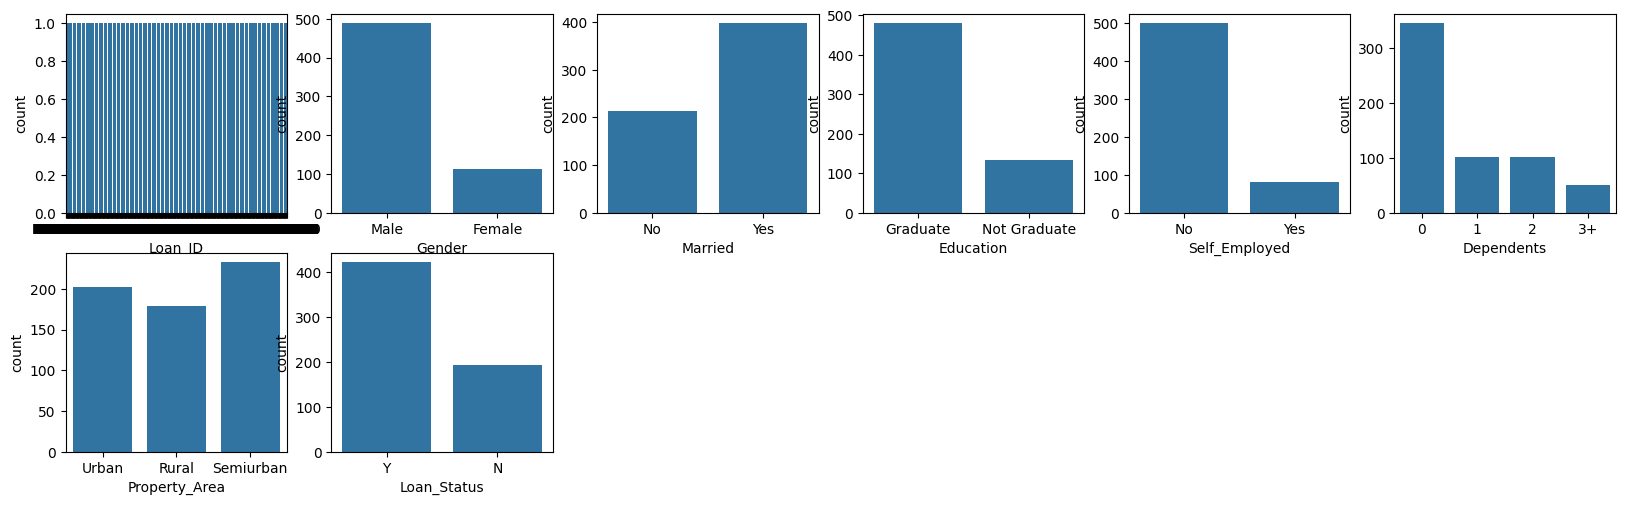

In [31]:
cols = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(20,15))
plotnumber=1
for column in cols:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.countplot(x=data[column], ax=ax)
        plt.xlabel(column)
    plotnumber+=1


plt.show()

<Figure size 500x600 with 0 Axes>

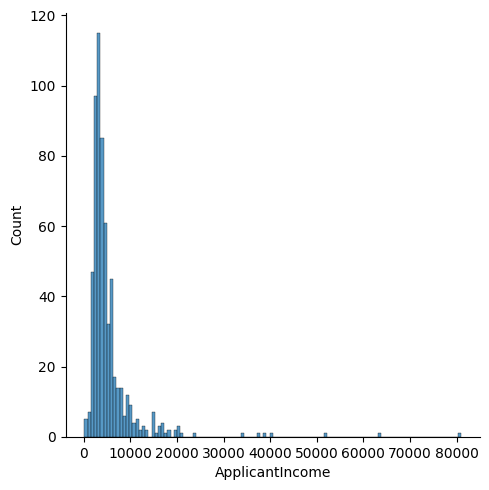

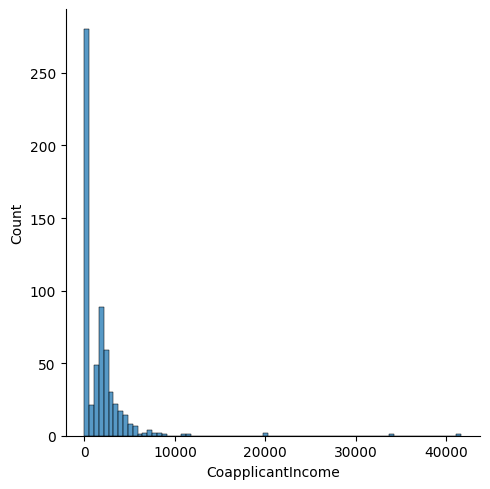

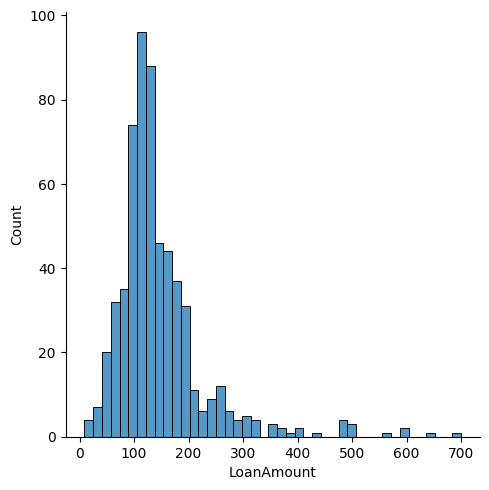

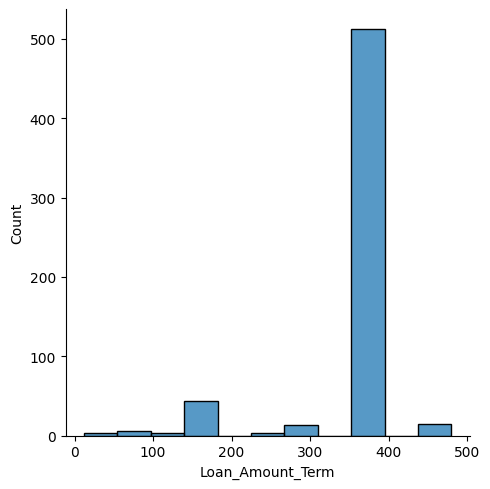

In [32]:
num_cols = [i for i in data.drop(cols, axis=1)]
num_cols.remove('Credit_History')

plt.figure(figsize=(5,6))
for column in num_cols:
    sns.displot(data[column])
    plt.xlabel(column)
plt.show()

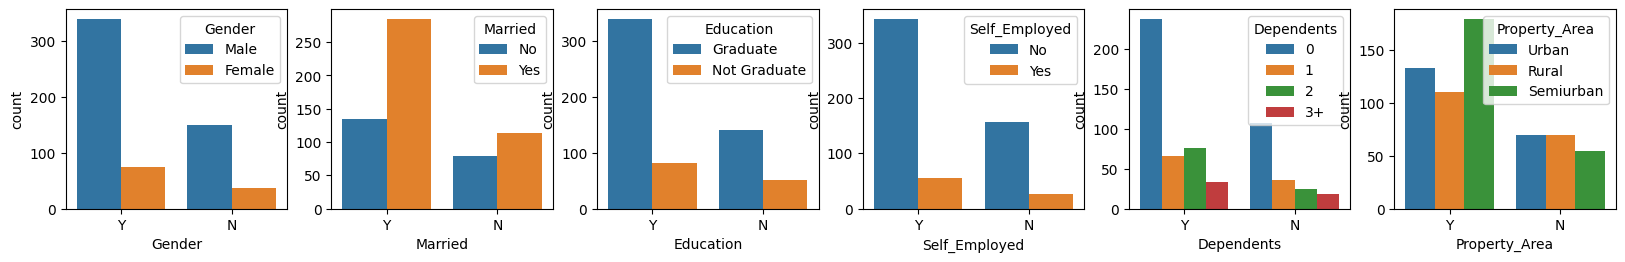

In [9]:
cols.remove('Loan_Status')
cols.remove('Loan_ID')
plt.figure(figsize=(20,15))
plotnumber=1
for column in cols:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.countplot(x=data['Loan_Status'], hue=data[column], ax=ax)
        plt.xlabel(column)
    plotnumber+=1


plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

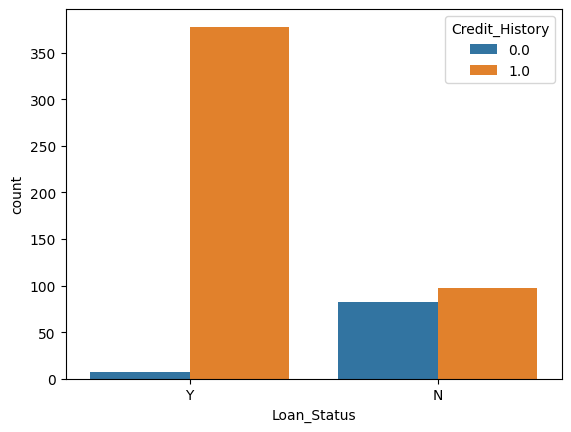

In [11]:
sns.countplot(x='Loan_Status',  hue='Credit_History', data=data)

<Axes: >

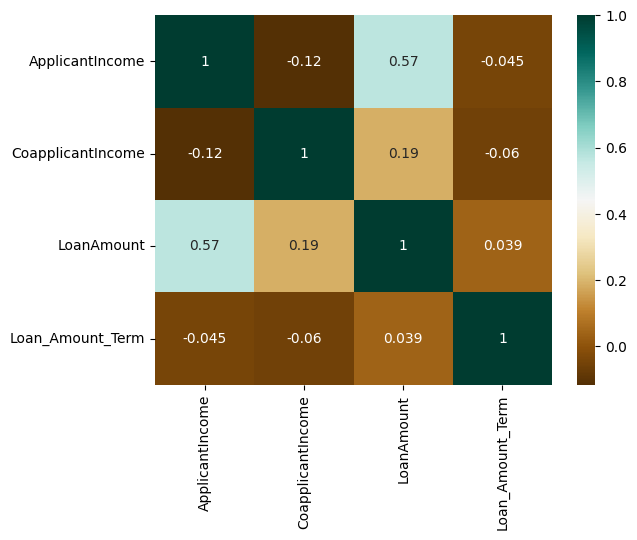

In [239]:
sns.heatmap(data[num_cols].corr(),annot = True, cmap = 'BrBG')

### Data Cleaning

In [10]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [242]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
print(len(data.index))

480


In [244]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
data.drop('Loan_ID', axis=1, inplace=True)

In [15]:
sex = pd.get_dummies(data['Gender'], drop_first=True)
married = pd.get_dummies(data['Married'], drop_first=True)
graduate = pd.get_dummies(data['Education'])
self_employed = pd.get_dummies(data['Self_Employed'], drop_first=True)
property_loc = pd.get_dummies(data['Property_Area'], drop_first=True)
dependent = pd.get_dummies(data['Dependents'])
status = pd.get_dummies(data['Loan_Status'], drop_first=True)



In [16]:
status = status.rename(columns={'Y':'Loan_status'})
married = married.rename(columns={'Yes':'Married'})
graduate = graduate.drop('Not Graduate', axis=1)
dependent = dependent.drop('3+', axis=1)
self_employed = self_employed.rename(columns={'Yes':'Self_employed'})

In [17]:
data = pd.concat([data, sex, married, graduate, dependent, self_employed, property_loc, status], axis=1)

In [18]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Male,Married,Graduate,0,1,2,Self_employed,Semiurban,Urban,Loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,True,True,True,False,True,False,False,False,False,False
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,True,True,True,True,False,False,True,False,True,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,True,True,False,True,False,False,False,False,True,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,True,False,True,True,False,False,False,False,True,True
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,...,True,True,True,False,False,True,True,False,True,True


In [19]:
data.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area', 'Dependents'], axis=1, inplace=True)

In [251]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Graduate,0,1,2,Self_employed,Semiurban,Urban,Loan_status
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,False,True,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,True,True,False,False,False,False,True,True
5,5417,4196.0,267.0,360.0,1.0,True,True,False,False,True,True,False,True,True


### Train Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('Loan_status', axis=1)
y = data['Loan_status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    'LRG': LogisticRegression(),
    'DTC': DecisionTreeClassifier(),
    'KNC': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'GNB': GaussianNB(),
    'SVC': SVC()
}

### Accuracy Test

In [24]:
model_scores = {}
for name in models:
    model = models[name]
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    score = accuracy_score(y_test, prediction)
    model_scores[name] = score


In [25]:
for score in model_scores:
    print(f'{score} : {model_scores[score]:.2f}')

LRG : 0.82
DTC : 0.72
KNC : 0.66
LDA : 0.82
GNB : 0.82
SVC : 0.71


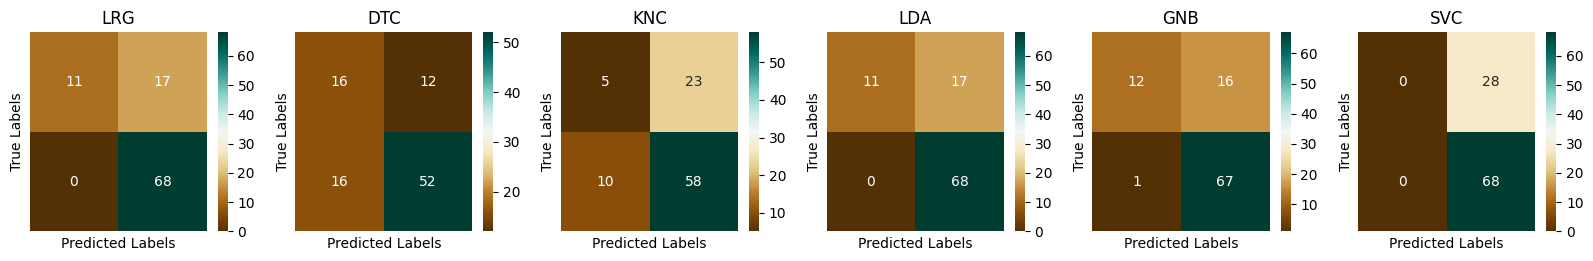

In [275]:
plt.figure(figsize=(20,15))
plotnumber=1

for name in models:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        model = models[name]
        model.fit(X_train, y_train)

        prediction = model.predict(X_test)
        matrix = confusion_matrix(y_test, prediction)
  
        sns.heatmap(matrix, annot = True, cmap = 'BrBG', fmt='d', yticklabels=False, xticklabels=False, ax=ax)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(name)

    plotnumber+=1

plt.show()
    
    

In [278]:
selected_model = LogisticRegression()
selected_model.fit(X_train, y_train)

LogisticRegression()

### Example Use

In [298]:
x = np.array(X_test.iloc[0])
y = selected_model.predict([x])
print(y)



[ True]
